In [1]:
import numpy as np 
import scipy as sci 
from scipy.optimize import curve_fit
import pandas as pd

dataset = pd.read_csv(datapath+'noInt.csv')


In [2]:
datapath = '../../cleanData/csvs/resonant/'


In [14]:
dataset = pd.read_csv(datapath+'4-8-25-thetaSTD.csv')


In [15]:
dataset['nearTheta'] = dataset['thetaVecMagnear'] * np.abs(dataset['thetaVecAngnear'])
dataset['farTheta'] = dataset['thetaVecMagfar'] * np.abs(dataset['thetaVecAngfar'])

In [16]:
df = dataset.dropna()


In [17]:
lab = ['Tsec', '3BRfill', '2BRfillnear', '2BRfillfar', 'nearTheta', 'farTheta']

In [ ]:
dfT = df[(df['Stable']==True)]
dfF = df[(df['Stable']==False)]
train = pd.concat((dfF.iloc[:7000],dfT.iloc[:7000]))
test = pd.concat((dfF.iloc[7000:14000],dfT.iloc[7000:]))


In [22]:
test

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,2BRfillnear,thetaSTDnear,thetanear,thetaVecAngnear,thetaVecMagnear,...,MEGNOstd,Tsec,InitialStable,Unnamed: 0,runstring,instability_time,shadow_instability_time,Stable,nearTheta,farTheta
12571,12571,0.124015,0.040466,0.008255,0.019094,0.259070,1.819892,3.125845,1.927428,0.001043,...,0.011586,40377.736838,1.0,12571,3325397.bin,1.357216e+08,3.748615e+08,False,0.002011,3.110867
12573,12573,0.130571,0.043724,0.000329,0.654425,1.630807,0.364618,4.729507,-3.125541,0.934560,...,0.255423,1220.122758,1.0,12573,3325400.bin,1.107181e+06,3.455854e+05,False,2.921005,1.656877
12575,12575,0.047505,0.025835,0.000251,0.129896,2.184365,1.829328,3.613532,-2.943334,0.374973,...,0.007537,3178.880533,1.0,12575,3325403.bin,3.866029e+05,2.895415e+05,False,1.103669,0.496083
12582,12582,0.151994,0.024721,0.001969,0.052933,0.212654,1.840808,3.340023,-2.986795,0.160377,...,0.271573,3888.362340,1.0,12582,3325419.bin,7.079977e+08,6.635171e+08,False,0.479013,0.072792
12583,12583,0.076331,0.044606,0.000424,0.041172,0.481516,1.999388,3.385175,-2.263718,0.295218,...,0.001265,8360.259951,1.0,12583,3326000.bin,4.095058e+06,1.944826e+05,False,0.668291,0.002472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102241,102241,0.165220,0.010995,0.001756,0.041770,0.099187,1.816187,3.143196,1.918624,0.000845,...,0.005806,38221.004472,1.0,102241,8936629.bin,1.000000e+09,1.000000e+09,True,0.001622,3.120674
102252,102252,0.081797,0.016356,0.000475,0.882172,0.503213,0.134177,4.711368,3.140577,0.991028,...,0.000824,18035.659807,1.0,102252,8937881.bin,1.000000e+09,1.000000e+09,True,3.112399,0.008389
102261,102261,0.142630,0.048276,0.009391,0.465563,2.240854,0.292703,4.713222,-3.140762,0.957824,...,0.000996,97654.673467,1.0,102261,8938516.bin,1.000000e+09,1.000000e+09,True,3.008297,0.002220
102279,102279,0.212044,0.011125,0.000408,2.102719,0.268046,0.096451,4.708956,3.138143,0.995356,...,0.004434,7299.471712,1.0,102279,8941009.bin,1.000000e+09,1.000000e+09,True,3.123568,0.032972


In [23]:
xdata = np.transpose(np.array(train[lab]))

In [24]:
t =np.array(test[lab])
tV = np.array(test['Stable'])

In [25]:
ydata = np.array(train['Stable'],dtype=int)

In [116]:
# def fit(x, a,aa,b,bb,d,dd,e,ee,f,ff,g,gg):
#     c = [a,aa,b,bb,d,dd,e,ee,f,ff,g,gg]
#     s = 0
#     for i in range(6):
#         s+= 1 / ((1 + np.exp(-(x[i] * c[2*i])+c[2*i+1]))*8)
#     return s**6
def fit(x, *args):
    c = args
    s = 0
    for i in range(6):
        s+= 1 / ((1 + np.exp(-(x[i] * c[2*i])+c[2*i+1]))*8)
    return s**6

In [117]:
df[lab].describe()

,Tsec,3BRfill,2BRfillnear,2BRfillfar,nearTheta,farTheta
count,70803.000000,70803.000000,70803.000000,70803.000000,7.080300e+04,7.080300e+04
mean,17925.054714,1.053835,4.126667,0.391149,1.271330e+00,4.484038e-01
std,22110.854334,2.716082,703.071566,1.448781,1.213225e+00,8.113931e-01
min,751.291776,0.003625,-179162.572827,0.000203,4.048785e-07,5.381024e-07
25%,4915.456032,0.173119,0.370538,0.031884,1.082872e-01,1.734151e-02
50%,10001.704588,0.443687,1.175809,0.104309,8.275621e-01,8.656944e-02
75%,21618.543714,1.090963,3.758034,0.336339,2.656108e+00,3.712054e-01
max,241280.324228,335.260781,29970.860268,222.648794,3.141182e+00,3.140404e+00


In [118]:
m = [21618.543714,1,1.090963,1,3.758034,1,0.336339,1,2.656108e+00,1,3.712054e-01,1]

In [119]:
#m = [0.982453, 1, 14004.784042,1, 1.194679,1, 154034.130090,1, 241280.324228,1, 141.043408,1, 45649.990785,1, 86.131097,1]

In [120]:
p = np.ones(12)/m

In [121]:
a = curve_fit(fit, xdata, ydata, p0=p)

/tmp/ipykernel_55248/2514293752.py:11: RuntimeWarning: overflow encountered in exp
  s+= 1 / ((1 + np.exp(-(x[i] * c[2*i])+c[2*i+1]))*8)
/tmp/ipykernel_55248/2514293752.py:11: RuntimeWarning: overflow encountered in multiply
  s+= 1 / ((1 + np.exp(-(x[i] * c[2*i])+c[2*i+1]))*8)
/home/miniconda3/envs/ethadhani/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import hyperopt
import sys
from sklearn import metrics
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [128]:
def fitF(x):
    return fit(x, *a[0])

In [129]:
def ROC_curve(x,y):
    preds = list(map(fitF, x))
    fpr, tpr, ROCthresholds = roc_curve(y, preds)
    roc_auc = metrics.roc_auc_score(y, preds)
    return roc_auc, fpr, tpr, ROCthresholds

In [130]:
len(tV)

14285

/tmp/ipykernel_55248/2514293752.py:11: RuntimeWarning: overflow encountered in exp
  s+= 1 / ((1 + np.exp(-(x[i] * c[2*i])+c[2*i+1]))*8)


Text(0.5, 1.0, '(one model AUC = 0.7941)')

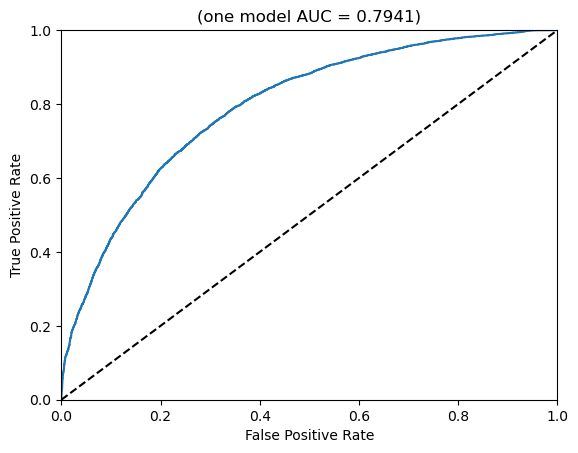

In [131]:
roc_auc, fpr, tpr, ROCthresholds = ROC_curve(t, tV)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('(one model AUC = {0:.4f})'.format(roc_auc))

In [218]:
ROCthresholds[1000]

0.6770023871606912

In [222]:
tpr[4000]

0.9436979306638

In [210]:
fpr[2000]

0.20157142857142857

In [114]:
def test(*args):
    print(args)